In [78]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.mixture import GaussianMixture
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [13]:
crab = pd.read_csv("C:/Users/user/dohyeon/CrabAgePrediction.csv")

<Axes: xlabel='Length', ylabel='Age'>

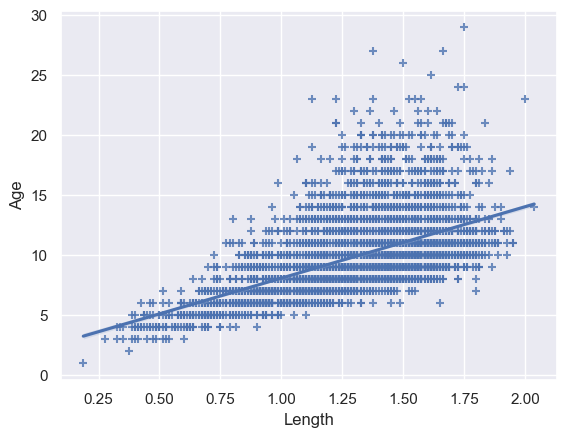

In [15]:
sns.regplot(data=crab, x='Length', y='Age', marker='+')

In [16]:
reg = LinearRegression()

In [17]:
crab.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


In [56]:
reg.fit(np.log(crab['Length']).values.reshape(-1,1), crab['Age'])
#fit(x,y) 학습 #class 생성
#reshape를 해줘야함.

LinearRegression()

In [58]:
reg.predict([[1.4375]])
#그냥 3을넣으면 2차원 데이터로 필요해

array([17.8854035])

2.995732273553991

In [20]:
#새로운 변수로 age를 생성해보자.
crab.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


<Axes: xlabel='Shell Weight', ylabel='Age'>

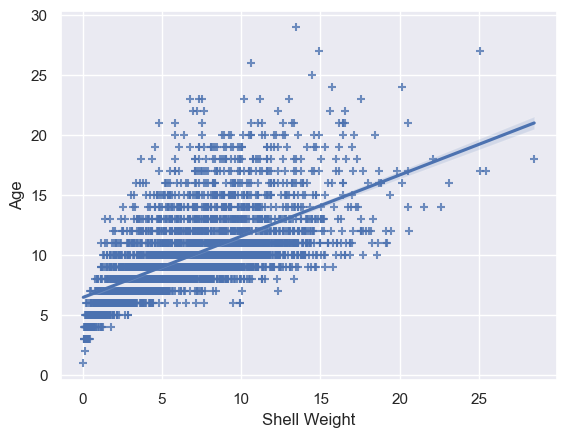

In [22]:
#과연 성별과 길이간의 상관관계가 있을까? ㅇ이거는 근데 원핫코딩해야될거 같은데..?
#그냥 Shell Weight와 Age간의 관계를 알아보자
sns.regplot(data=crab, x='Shell Weight', y='Age', marker='+')
#조금 애매한거 같기도하고..

# GMM 클러스터링

In [67]:
pca = PCA(n_components=2)
#차원에 대한 정의가 필요함. 2차원인거임.
iris = sns.load_dataset('iris')

In [68]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [79]:
iris_pca = pca.fit_transform(iris.iloc[:,:-1])
#SPECIES만 제외하고 2차원으로 평면 시각화가 가능하다.
iris_pca_df = pd.DataFrame(iris_pca, columns=['PCA_component_1','PCA_component_2'])

In [76]:
pca.fit_transform(iris.iloc[:,:-1])
#아무런 의미없음.
#어느정도 iris의 정보를 가지고는 있다.
iris_pca_df = pd.DataFrame(iris_pca, columns=['PCA_component_1','PCA_component_2'])
iris_pca_df

,PCA_component_1,PCA_component_2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755
...,...,...
145,1.944110,0.187532
146,1.527167,-0.375317
147,1.764346,0.078859
148,1.900942,0.116628


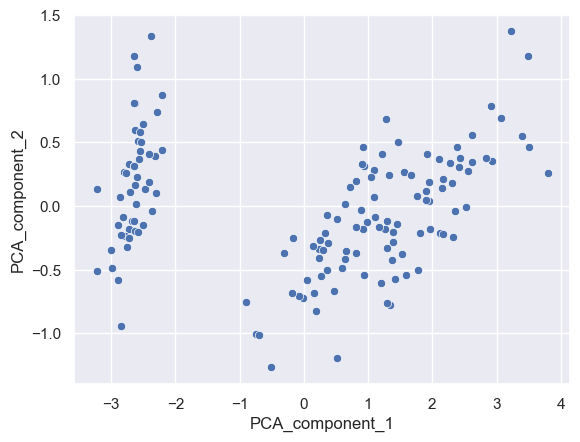

In [70]:
sns.scatterplot(data=iris_pca_df, x='PCA_component_1', y='PCA_component_2')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


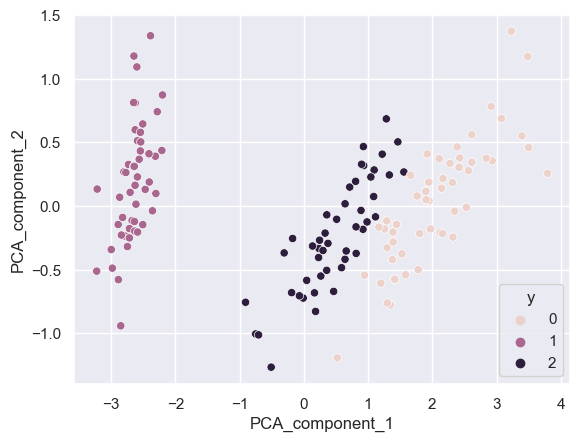

In [72]:
gmm = GaussianMixture(n_components=3, random_state=12345)
gmm_y = gmm.fit_predict(iris_pca_df)

iris_pca_df['y'] = gmm_y
sns.scatterplot(data=iris_pca_df, x='PCA_component_1', y='PCA_component_2', hue='y')
plt.show()

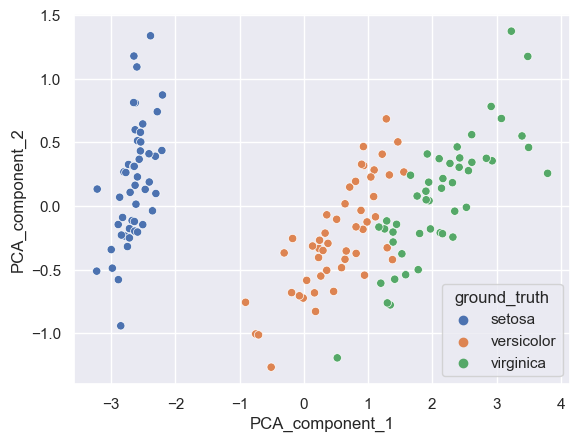

In [73]:
iris_pca_df['ground_truth'] = iris['species']
sns.scatterplot(data=iris_pca_df, x='PCA_component_1', y='PCA_component_2', hue='ground_truth')
plt.show()

# 나만의 분석방법과 머신러닝을 통해 인사이트를 도출